In [532]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
sns.set() 
import warnings
warnings.filterwarnings('ignore')
rand_state= 1000

In [ ]:
#import data and look at what we're working with

In [533]:
df = pd.read_csv("credit_card_clean.csv")
df_raw = df
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,1,20000.0,female,university,married,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,female,university,single,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,female,university,single,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,female,university,married,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,male,university,married,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [ ]:
#checking for duplicates

In [534]:
df.isna().sum()/len(df) *100

ID           0.0
LIMIT_BAL    0.0
SEX          0.0
EDUCATION    0.0
MARRIAGE     0.0
AGE          0.0
PAY_1        0.0
PAY_2        0.0
PAY_3        0.0
PAY_4        0.0
PAY_5        0.0
PAY_6        0.0
BILL_AMT1    0.0
BILL_AMT2    0.0
BILL_AMT3    0.0
BILL_AMT4    0.0
BILL_AMT5    0.0
BILL_AMT6    0.0
PAY_AMT1     0.0
PAY_AMT2     0.0
PAY_AMT3     0.0
PAY_AMT4     0.0
PAY_AMT5     0.0
PAY_AMT6     0.0
DEFAULT      0.0
dtype: float64

In [535]:
df.duplicated().sum()

0

In [ ]:
#changing the feature variables that we see fit into categorical variables

In [536]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'DEFAULT'],
      dtype='object')

In [537]:
categoricals = ['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_1','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'DEFAULT']
for col in categoricals:
    print (col, sorted(set(df[col])))

SEX ['female', 'male']
EDUCATION ['grad', 'highschool', 'other', 'university']
MARRIAGE ['married', 'other', 'single']
PAY_1 [-2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8]
PAY_2 [-2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8]
PAY_3 [-2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8]
PAY_4 [-2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8]
PAY_5 [-2, -1, 0, 2, 3, 4, 5, 6, 7, 8]
PAY_6 [-2, -1, 0, 2, 3, 4, 5, 6, 7, 8]
DEFAULT [0, 1]


In [ ]:
#looking at values for categorical variables that we set

In [538]:
for col in categoricals:
    print(df[col].value_counts()/len(df[col]))

female    0.603733
male      0.396267
Name: SEX, dtype: float64
university    0.467667
grad          0.352833
highschool    0.163900
other         0.015600
Name: EDUCATION, dtype: float64
single     0.532133
married    0.455300
other      0.012567
Name: MARRIAGE, dtype: float64
 0    0.491233
-1    0.189533
 1    0.122933
-2    0.091967
 2    0.088900
 3    0.010733
 4    0.002533
 5    0.000867
 8    0.000633
 6    0.000367
 7    0.000300
Name: PAY_1, dtype: float64
 0    0.524333
-1    0.201667
 2    0.130900
-2    0.126067
 3    0.010867
 4    0.003300
 1    0.000933
 5    0.000833
 7    0.000667
 6    0.000400
 8    0.000033
Name: PAY_2, dtype: float64
 0    0.525467
-1    0.197933
-2    0.136167
 2    0.127300
 3    0.008000
 4    0.002533
 7    0.000900
 6    0.000767
 5    0.000700
 1    0.000133
 8    0.000100
Name: PAY_3, dtype: float64
 0    0.548500
-1    0.189567
-2    0.144933
 2    0.105300
 3    0.006000
 4    0.002300
 7    0.001933
 5    0.001167
 6    0.000167
 8    0

In [539]:
df['EDUCATION'].value_counts()

university    14030
grad          10585
highschool     4917
other           468
Name: EDUCATION, dtype: int64

In [540]:
df['MARRIAGE'].value_counts()

single     15964
married    13659
other        377
Name: MARRIAGE, dtype: int64

In [541]:
df['SEX'].value_counts()

female    18112
male      11888
Name: SEX, dtype: int64

In [ ]:
#checking for instances where there are data points that would throw off our regression with the variables education, marriage, and sex

In [542]:
for col in ['SEX', 'EDUCATION', 'MARRIAGE','PAY_1','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6', 'DEFAULT']:
    df[col]= df[col].astype("category")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   ID         30000 non-null  int64   
 1   LIMIT_BAL  30000 non-null  float64 
 2   SEX        30000 non-null  category
 3   EDUCATION  30000 non-null  category
 4   MARRIAGE   30000 non-null  category
 5   AGE        30000 non-null  int64   
 6   PAY_1      30000 non-null  category
 7   PAY_2      30000 non-null  category
 8   PAY_3      30000 non-null  category
 9   PAY_4      30000 non-null  category
 10  PAY_5      30000 non-null  category
 11  PAY_6      30000 non-null  category
 12  BILL_AMT1  30000 non-null  float64 
 13  BILL_AMT2  30000 non-null  float64 
 14  BILL_AMT3  30000 non-null  float64 
 15  BILL_AMT4  30000 non-null  float64 
 16  BILL_AMT5  30000 non-null  float64 
 17  BILL_AMT6  30000 non-null  float64 
 18  PAY_AMT1   30000 non-null  float64 
 19  PAY_AMT2   30000 non-null

In [ ]:
#List of variables and variable type to make sure everything worked

In [543]:
#our target variable will be default

In [544]:
pd.crosstab(df['DEFAULT'],df['DEFAULT'], normalize='all')*100

DEFAULT,0,1
DEFAULT,,
0,77.88,0.00
1,0.00,22.12


In [545]:
#this 78/22 split is pretty well balanced. There will be enough default=1 and default=0 observations to train the model

In [ ]:
#changing our categorical variables into dummy variables

In [546]:
df = pd.get_dummies(df, drop_first=True)

In [547]:
pd.set_option("display.max.columns", None)
df.tail()

,ID,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,SEX_male,EDUCATION_highschool,EDUCATION_other,EDUCATION_university,MARRIAGE_other,MARRIAGE_single,PAY_1_-1,PAY_1_0,PAY_1_1,PAY_1_2,PAY_1_3,PAY_1_4,PAY_1_5,PAY_1_6,PAY_1_7,PAY_1_8,PAY_2_-1,PAY_2_0,PAY_2_1,PAY_2_2,PAY_2_3,PAY_2_4,PAY_2_5,PAY_2_6,PAY_2_7,PAY_2_8,PAY_3_-1,PAY_3_0,PAY_3_1,PAY_3_2,PAY_3_3,PAY_3_4,PAY_3_5,PAY_3_6,PAY_3_7,PAY_3_8,PAY_4_-1,PAY_4_0,PAY_4_1,PAY_4_2,PAY_4_3,PAY_4_4,PAY_4_5,PAY_4_6,PAY_4_7,PAY_4_8,PAY_5_-1,PAY_5_0,PAY_5_2,PAY_5_3,PAY_5_4,PAY_5_5,PAY_5_6,PAY_5_7,PAY_5_8,PAY_6_-1,PAY_6_0,PAY_6_2,PAY_6_3,PAY_6_4,PAY_6_5,PAY_6_6,PAY_6_7,PAY_6_8,DEFAULT_1
29995,29996,220000.0,39,188948.0,192815.0,208365.0,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
29996,29997,150000.0,43,1683.0,1828.0,3502.0,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,1,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
29997,29998,30000.0,37,3565.0,3356.0,2758.0,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
29998,29999,80000.0,41,-1645.0,78379.0,76304.0,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
29999,30000,50000.0,46,47929.0,48905.0,49764.0,36535.0,32428.0,15313.0,2078.0,1800.0,1430.0,1000.0,1000.0,1000.0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1


In [548]:
len(df.columns)

80

In [549]:
#we now have 80 features

In [ ]:
#defining feature space and splitting data set into 30% testing and 70% training

In [550]:
y = df['DEFAULT_1']
X = df.drop('DEFAULT_1', axis=1)

In [551]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=rand_state)

In [ ]:
#training logistic regression and saving predicted probabilities

In [552]:
from sklearn.linear_model import LogisticRegression

In [553]:
logistic = LogisticRegression()
logistic.fit(X_train, y_train)

LogisticRegression()

In [554]:
y_hat      = logistic.predict(X_test)
y_hat_probs = logistic.predict_proba(X_test)[:,1] 

In [ ]:
#plotting histogram 

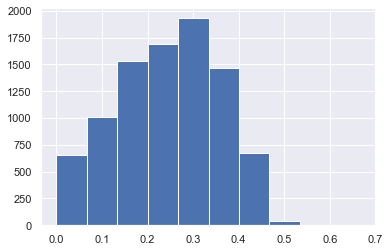

In [555]:
plt.hist(y_hat_probs)
plt.show()

In [ ]:
#fairly normal distribution, slight right skew
#what if the threshold is 80%?

In [556]:
y_hat_80 = np.where(y_hat_probs>0.80,1,0)

In [ ]:
#plotting histogram with threshold set to .8

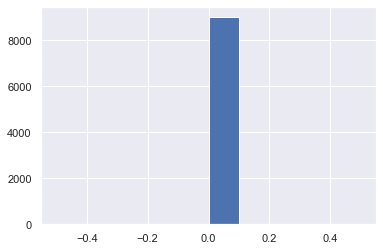

In [557]:
plt.hist(y_hat_80)
plt.show()

In [ ]:
#At a threshold of .8, the model always predicts 0
#The implication on recall is that it should decrease with the higher threshold

In [ ]:
#generating predicted classifications .3 and .6 threshold

In [558]:
y_hat_30 = np.where(y_hat_probs>0.30,1,0)
y_hat_60 = np.where(y_hat_probs>0.60,1,0)

In [ ]:
#You should use the lower threshold (.3) to avoid false negatives becaause if a threshold is higher, specificity is higher causing more false negatives
#constructing a dataframe to show the y_test and y_hat values for the different thresholds

In [559]:
df_predictions = pd.DataFrame({'y_test':y_test, 'y_hat_probs':y_hat_probs, 'y_hat_30':y_hat_30, 'y_hat_60':y_hat_60, 'y_hat_80':y_hat_80,})
df_predictions.head()

,y_test,y_hat_probs,y_hat_30,y_hat_60,y_hat_80
28559,1,0.078646,0,0,0
14547,0,0.203391,0,0,0
7338,1,0.428401,1,0,0
23470,0,0.237897,0,0,0
1515,0,0.288448,0,0,0


In [560]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score



def my_logistic_report(X_train, y_train, X_test,y_test, threshold=0.5): # you could make it even more general!
    logistic= LogisticRegression()
    logistic.fit(X_train, y_train)
    probs = logistic.predict_proba(X_test)[:,1]
    y_hat = np.where(probs>=threshold,1,0)
    
    cm = confusion_matrix(y_test, y_hat)
    accuracy = round(accuracy_score(y_test,y_hat) ,2)
    precision = round(precision_score(y_test,y_hat),2)
    recall = round(recall_score(y_test,y_hat),2)
    f1score = round(f1_score(y_test,y_hat),2)
    cm_labled = pd.DataFrame(cm, index=['Actual : negative ','Actual : positive'], columns=['Predict : negative','Predict :positive '])
    
    print("-----------------------------------------")
    print('Accuracy  = {}'.format(accuracy))
    print('Precision = {}'.format(precision))
    print('Recall    = {}'.format(recall))
    print('f1_score  = {}'.format(f1score))
    print("-----------------------------------------")
    return cm_labled
 

In [ ]:
#borrowing logistic report

In [561]:
my_logistic_report(X_train, y_train, X_test,y_test, threshold=0.5)

-----------------------------------------
Accuracy  = 0.78
Precision = 0.0
Recall    = 0.0
f1_score  = 0.0
-----------------------------------------


,Predict : negative,Predict :positive
Actual : negative,7008,3
Actual : positive,1989,0


In [ ]:
#Accuracy is .78 meaning our model can predict with 78% accuracy
#Recall is 0 because we do not have very many false positives, our data is accurate
#Precision is 0 because we do not have any strong groupings in the dataset
#f1 score is 0 because precision and recall are 0.

#We trust the accuracy of this model at the .5 threshold because we have high accuracy and low recall

In [562]:
my_logistic_report(X_train, y_train, X_test,y_test, threshold=0.3)

-----------------------------------------
Accuracy  = 0.66
Precision = 0.32
Recall    = 0.51
f1_score  = 0.39
-----------------------------------------


,Predict : negative,Predict :positive
Actual : negative,4896,2115
Actual : positive,984,1005


In [ ]:
#setting threshold to .3

In [ ]:
#changing the threshold decreases accuracy from .78 to .66 and increase precision to .32, recall to .51, and fl_score to .39
#the amount of false negatives decreased from 1989 to 984
#This is consistent with our answer to question 5.4 because the lower threshold has less false negatives

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.653


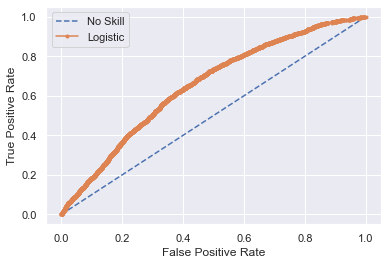

In [563]:
# generate a no skill (ns) prediction and logistic regression (lr) predictions.
ns_probs = [0.5 for i in range(len(y_test))]
lr_probs = logistic.predict_proba(X_test)[:,1]
# calculating scores for no skill and logistic regression
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

In [ ]:
#our model is doing a better job than random prediction; it expliains about 15% more than just no skill

In [566]:
from sklearn.model_selection import cross_val_score
import sklearn.metrics

In [573]:
#First let's bring back the report from part 6.1 for easy reference

In [573]:
my_logistic_report(X_train, y_train, X_test,y_test, threshold=0.5)

-----------------------------------------
Accuracy  = 0.78
Precision = 0.0
Recall    = 0.0
f1_score  = 0.0
-----------------------------------------


,Predict : negative,Predict :positive
Actual : negative,7008,3
Actual : positive,1989,0


In [ ]:
#estimating accuracy test with cross validation technique

In [571]:
accuracy_CV5 = cross_val_score(logistic, X_train, y_train, cv=5)
print('Cross-Validation Accuracy Scores', scores)

Cross-Validation Accuracy Scores [0.77952381 0.77904762 0.77904762 0.77857143 0.77857143 0.77857143
 0.77857143 0.77857143 0.77857143 0.77857143]


In [572]:
accuracy_CV10 = cross_val_score(logistic, X_train, y_train, cv=10)
print('Cross-Validation Accuracy Scores', scores)

Cross-Validation Accuracy Scores [0.77952381 0.77904762 0.77904762 0.77857143 0.77857143 0.77857143
 0.77857143 0.77857143 0.77857143 0.77857143]


In [ ]:
#these numbers are all very close because our model is useful for predicting new data